In [1]:
# Import 3rd party libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
all_data = pd.read_csv('C:\\Users\\zereb\\OneDrive\\Desktop\\Toronto\\all_datasets_2.csv')
all_data.head()

,Unnamed: 0,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,three_letter_pc_x,Average_Age_int,Average_Age,three_letter_pc_y,Average_Household_Income,Abbreviated_Postal_code,Annual_electricity_generation_k,Annual_ghg_reduction_kg,Roof_size,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg/m^2
0,0,Toronto,M1N,Multifamily Housing,0.36812575981152,0.1135377343418688,9.687520,74,M1N,3.965507,1946-1960,M1N,131075.252417,M1N,51147495.0,3580401.0,804935.0,63.542392,0.228753,4.448062
1,1,Scarborough,M1L,Multifamily Housing,0.40687583979168,0.3406132030256064,18.298649,39,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
2,2,Toronto,M1L,Multifamily Housing,0.259625535867072,0.6812264060512128,33.368124,46,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
3,3,Toronto,M1L,Multifamily Housing,0.38750079980159996,0.3406132030256064,17.222258,53,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205
4,4,Toronto,M1L,Multifamily Housing,0.38362579180358397,0.3406132030256064,19.375040,23,M1L,4.521639,1961-1975,M1L,97329.028602,M1L,101061619.0,7074310.0,1103429.0,91.588692,0.329719,6.411205


In [3]:
data_types = all_data.dtypes
print("Data types of columns:")
print(data_types)

Data types of columns:
Unnamed: 0                                 int64
City                                      object
Postal_Code                               object
PrimPropTypCalc                           object
WN_Sit_Elc_Int1                           object
WN_Sit_Gas_Int1                           object
GHG_Emiss_Int1                           float64
Ener_Star_Score                           object
three_letter_pc_x                         object
Average_Age_int                          float64
Average_Age                               object
three_letter_pc_y                         object
Average_Household_Income                 float64
Abbreviated_Postal_code                   object
Annual_electricity_generation_k          float64
Annual_ghg_reduction_kg                  float64
Roof_size                                float64
Annual_electricity_generation_kWh/m^2    float64
Annual_energy_generation_GJ/m^2          float64
Annual_ghg_reduction_kg/m^2              float

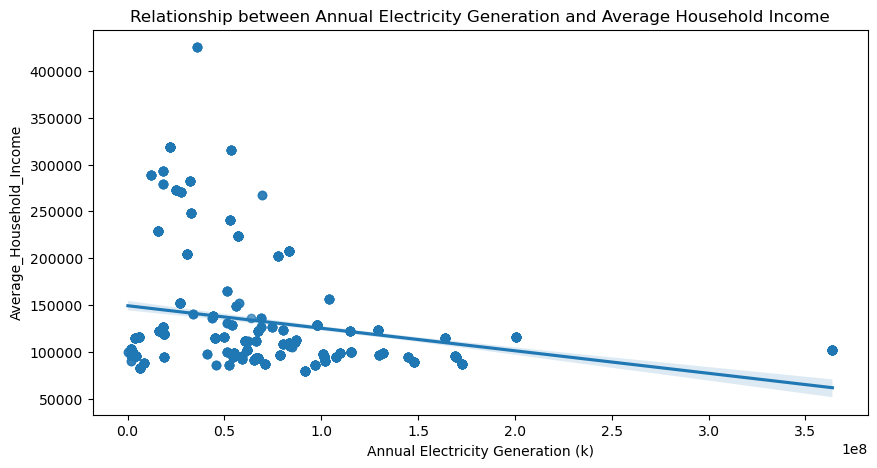

In [4]:
# Scatter plot with regression line using seaborn
plt.figure(figsize=(10, 5))
sns.regplot(x='Annual_electricity_generation_k', y='Average_Household_Income', data=all_data, scatter_kws={'alpha':0.7})
plt.title('Relationship between Annual Electricity Generation and Average Household Income')
plt.xlabel('Annual Electricity Generation (k)')
plt.ylabel('Average_Household_Income')
plt.grid(False)
plt.show()


In [5]:
all_data_filtered = all_data[['City',
                                       'Postal_Code',
                                       'PrimPropTypCalc',
                                       'WN_Sit_Elc_Int1',
                                       'WN_Sit_Gas_Int1',
                                       'GHG_Emiss_Int1',
                                       'Ener_Star_Score',
                                       'Average_Age_int',
                                       'Average_Age',
                                       'Average_Household_Income',
                                       'Annual_electricity_generation_k',
                                       'Annual_electricity_generation_kWh/m^2', 
                                       'Annual_energy_generation_GJ/m^2',
                                       'Annual_ghg_reduction_kg',
                                       'Annual_ghg_reduction_kg/m^2']]

all_data_filtered['Ener_Star_Score'] = pd.to_numeric(all_data_filtered['Ener_Star_Score'], errors='coerce')
all_data_filtered['Average_Household_Income'] = all_data_filtered['Average_Household_Income'].round().astype(int)
all_data_filtered.to_csv('data_to_show.csv', index=False)
all_data_filtered.head()

C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\149615947.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Ener_Star_Score'] = pd.to_numeric(all_data_filtered['Ener_Star_Score'], errors='coerce')
C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\149615947.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Average_Household_Income'] = all_data_filtered['Average_Household_Income'].round().astype(int)


,City,Postal_Code,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,GHG_Emiss_Int1,Ener_Star_Score,Average_Age_int,Average_Age,Average_Household_Income,Annual_electricity_generation_k,Annual_electricity_generation_kWh/m^2,Annual_energy_generation_GJ/m^2,Annual_ghg_reduction_kg,Annual_ghg_reduction_kg/m^2
0,Toronto,M1N,Multifamily Housing,0.36812575981152,0.1135377343418688,9.687520,74.0,3.965507,1946-1960,131075,51147495.0,63.542392,0.228753,3580401.0,4.448062
1,Scarborough,M1L,Multifamily Housing,0.40687583979168,0.3406132030256064,18.298649,39.0,4.521639,1961-1975,97329,101061619.0,91.588692,0.329719,7074310.0,6.411205
2,Toronto,M1L,Multifamily Housing,0.259625535867072,0.6812264060512128,33.368124,46.0,4.521639,1961-1975,97329,101061619.0,91.588692,0.329719,7074310.0,6.411205
3,Toronto,M1L,Multifamily Housing,0.38750079980159996,0.3406132030256064,17.222258,53.0,4.521639,1961-1975,97329,101061619.0,91.588692,0.329719,7074310.0,6.411205
4,Toronto,M1L,Multifamily Housing,0.38362579180358397,0.3406132030256064,19.375040,23.0,4.521639,1961-1975,97329,101061619.0,91.588692,0.329719,7074310.0,6.411205


C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\664779483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Income_Bins'] = pd.cut(all_data_filtered['Average_Household_Income'], bins=bins, labels=bin_labels)


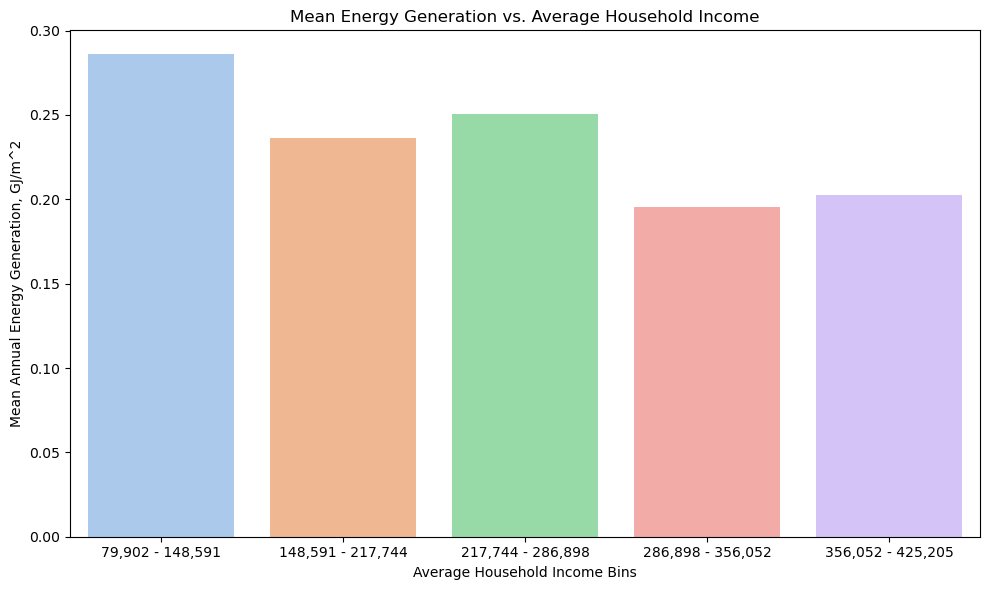

In [9]:
# Define the bins and labels
num_bins = 5
bin_labels = ['79,902 - 148,591', '148,591 - 217,744', '217,744 - 286,898', '286,898 - 356,052', '356,052 - 425,205']
bins = [79902, 148591, 217744, 286898, 356052, 425205]  # Define bin edges
pastel_palette = sns.color_palette("pastel")

# Create bins with custom labels for 'Average_Household_Income'
all_data_filtered['Income_Bins'] = pd.cut(all_data_filtered['Average_Household_Income'], bins=bins, labels=bin_labels)

# Group by 'Income_Bins' and find the mean of 'Annual_energy_generation_GJ/m^2'
grouped_data = all_data_filtered.groupby('Income_Bins')['Annual_energy_generation_GJ/m^2'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bins', y='Annual_energy_generation_GJ/m^2', data=grouped_data, palette=pastel_palette)
plt.xlabel('Average Household Income Bins')
plt.ylabel('Mean Annual Energy Generation, GJ/m^2')
plt.title('Mean Energy Generation vs. Average Household Income')
plt.tight_layout()
plt.show()


C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\3920308433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Income_Bins'] = pd.cut(all_data_filtered['Average_Household_Income'], bins=bins, labels=bin_labels)


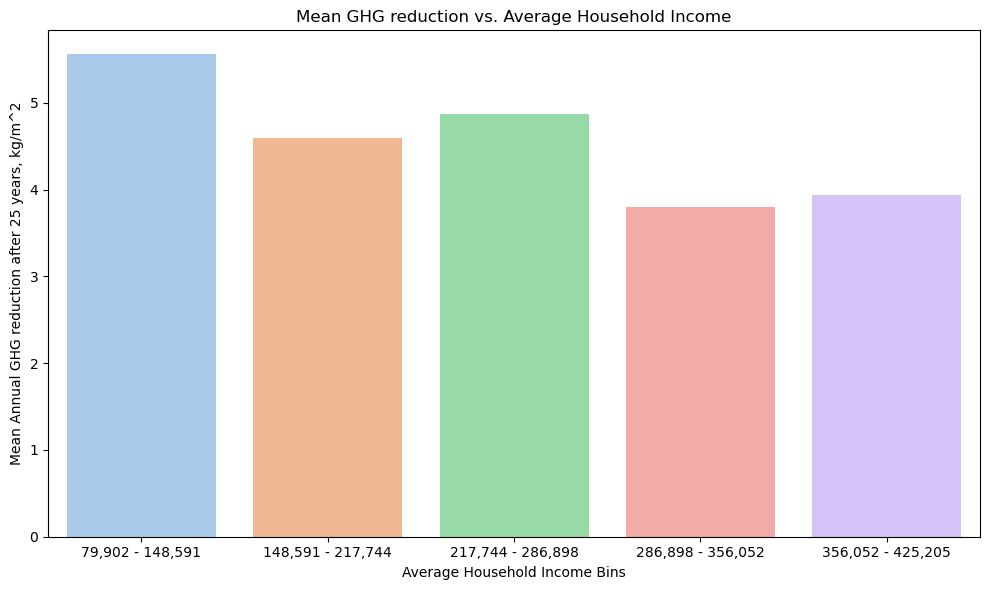

In [12]:
# Define the bins and labels
num_bins = 5
bin_labels = ['79,902 - 148,591', '148,591 - 217,744', '217,744 - 286,898', '286,898 - 356,052', '356,052 - 425,205']
bins = [79902, 148591, 217744, 286898, 356052, 425205]  # Define bin edges
pastel_palette = sns.color_palette("pastel")

# Create bins with custom labels for 'Average_Household_Income'
all_data_filtered['Income_Bins'] = pd.cut(all_data_filtered['Average_Household_Income'], bins=bins, labels=bin_labels)

# Group by 'Income_Bins' and find the mean of 'Annual_energy_generation_GJ/m^2'
grouped_data = all_data_filtered.groupby('Income_Bins')['Annual_ghg_reduction_kg/m^2'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Income_Bins', y='Annual_ghg_reduction_kg/m^2', data=grouped_data, palette=pastel_palette)
plt.xlabel('Average Household Income Bins')
plt.ylabel('Mean Annual GHG reduction after 25 years, kg/m^2')
plt.title('Mean GHG reduction vs. Average Household Income')
plt.tight_layout()
plt.show()


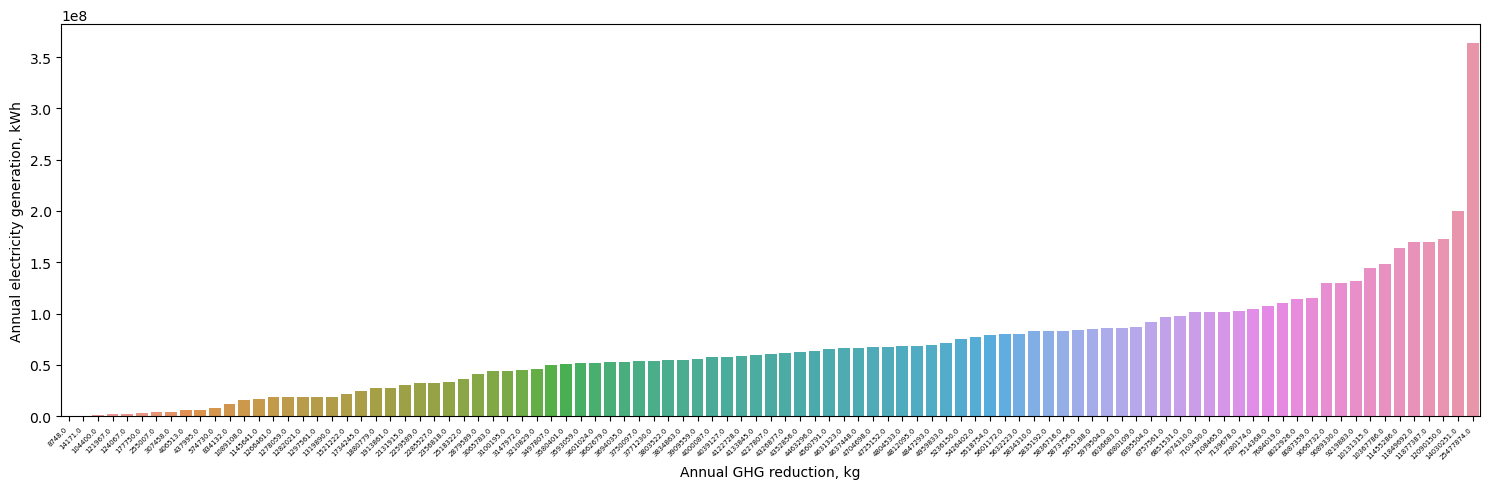

In [15]:
plt.figure(figsize=(15, 5))
plt.title('', fontsize=16)

ax = sns.barplot(x='Annual_ghg_reduction_kg', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Annual GHG reduction, kg')

plt.ylabel('Annual electricity generation, kWh')
plt.xticks(rotation=45, ha='right')
plt.tick_params(axis='x', labelsize=5)
plt.tight_layout()
plt.show()


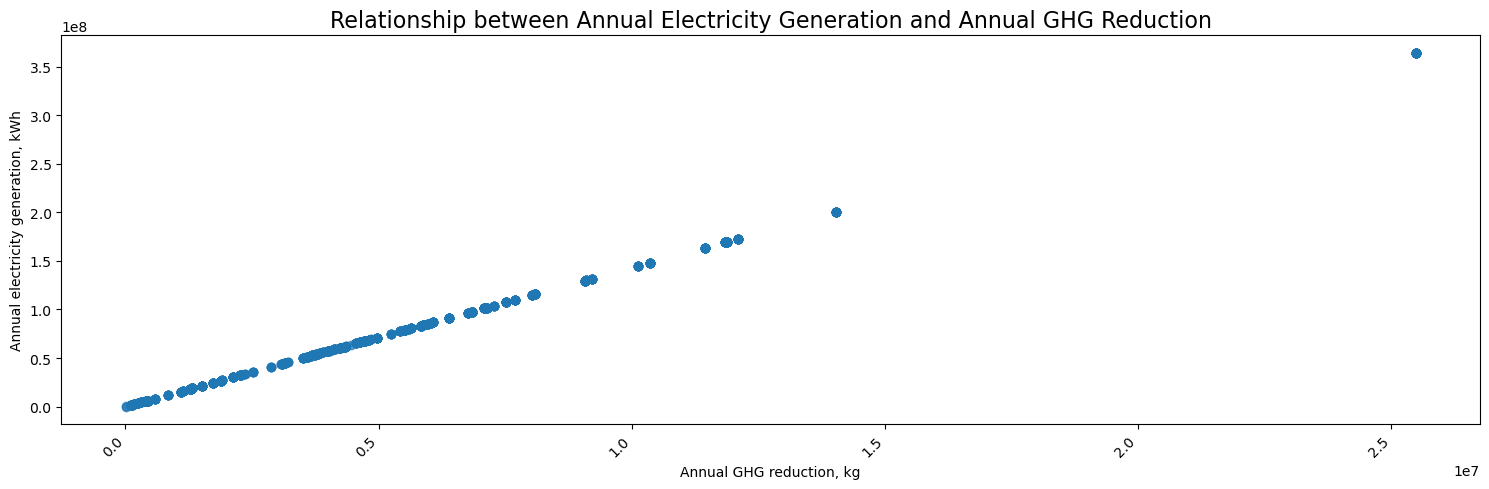

In [16]:
plt.figure(figsize=(15, 5))
plt.title('Relationship between Annual Electricity Generation and Annual GHG Reduction', fontsize=16)

plt.scatter(all_data_filtered['Annual_ghg_reduction_kg'], all_data_filtered['Annual_electricity_generation_k'], alpha=0.7)
plt.xlabel('Annual GHG reduction, kg')
plt.ylabel('Annual electricity generation, kWh')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [20]:
top_30_rows = all_data_filtered.nlargest(30, 'Annual_electricity_generation_k')
top_3_common = top_30_rows['PrimPropTypCalc'].value_counts().nlargest(3).index.tolist()
print("Three most common values in top 30:", top_3_common)

Three most common values in top 30: ['Other', 'Office', 'Multifamily Housing']


In [21]:
bottom_30_rows = all_data_filtered.nsmallest(30, 'Annual_electricity_generation_k')
top_3_common = top_30_rows['PrimPropTypCalc'].value_counts().nsmallest(3).index.tolist()
print("Three most common values in bottom 30:", top_3_common)

Three most common values in bottom 30: ['Laboratory', 'Wholesale Club/Supercenter', 'Entrepôt non réfrigéré']


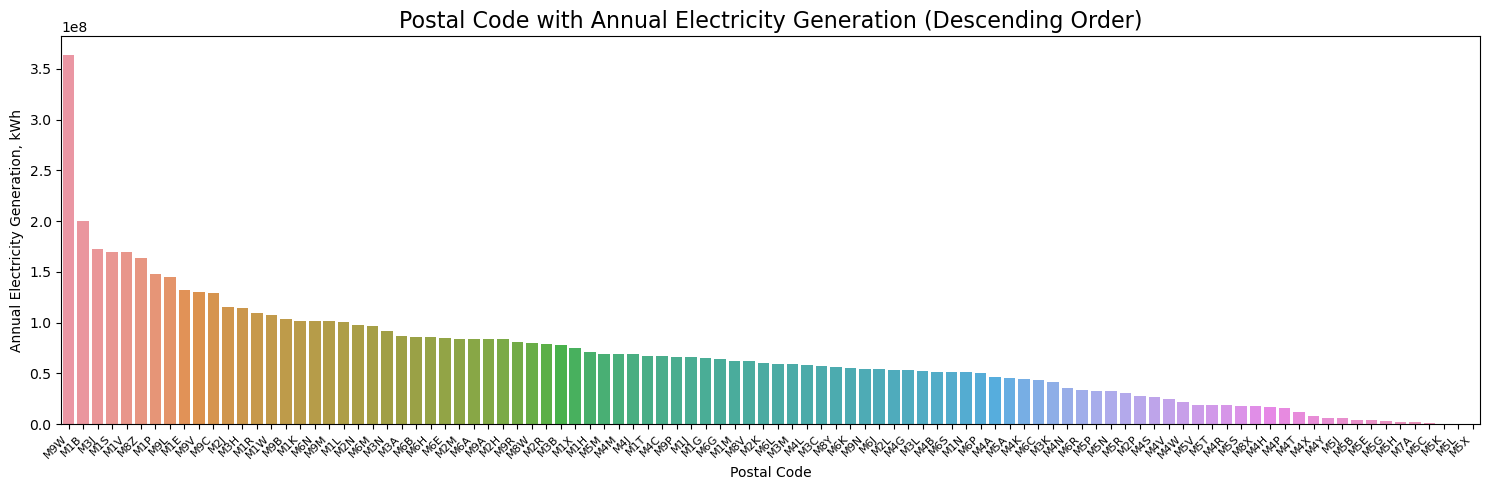

In [23]:
plt.figure(figsize=(15, 5))
plt.title('Postal Code with Annual Electricity Generation (Descending Order)', fontsize=16)

# Calculate the mean of 'Annual_electricity_generation_k' for each 'Postal_Code'
grouped_data = all_data_filtered.groupby('Postal_Code')['Annual_electricity_generation_k'].mean().reset_index()

# Sort the data by 'Annual Electricity Generation' in descending order
sorted_data = grouped_data.sort_values(by='Annual_electricity_generation_k', ascending=False)

# Use the sorted data for the bar plot
ax = sns.barplot(x='Postal_Code', y='Annual_electricity_generation_k', data=sorted_data, order=sorted_data['Postal_Code'])

plt.xlabel('Postal Code')
plt.ylabel('Annual Electricity Generation, kWh')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\707909981.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Sit_Intensity_Bins'] = pd.cut(all_data_filtered['WN_Sit_Elc_Int1'], bins=sit_bins, labels=sit_labels)


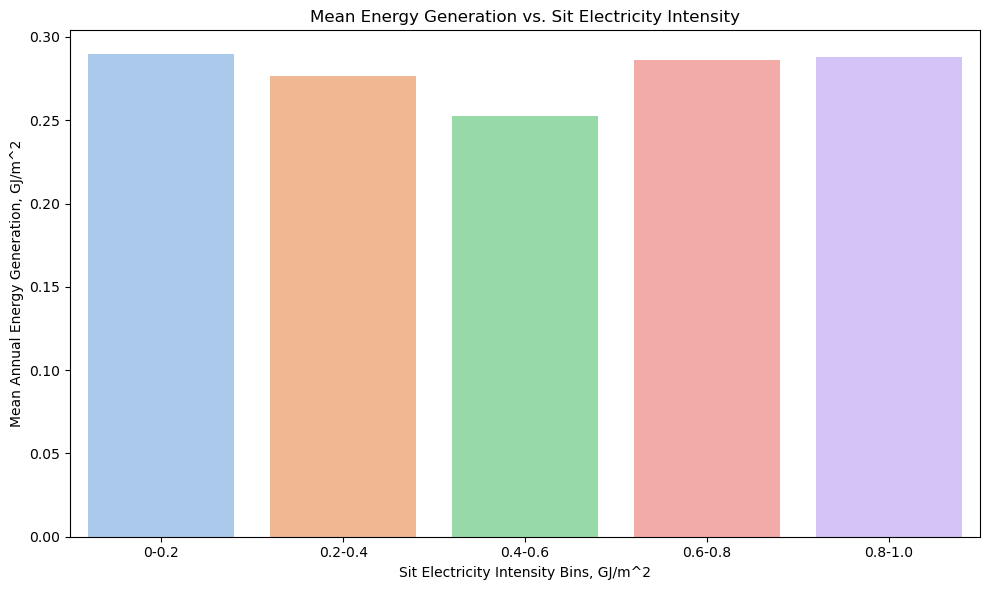

In [27]:
# Define the bins and labels for 'WN_Sit_Elc_Int1'
num_bins_sit = 5
sit_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
sit_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Define bin edges for WN_Sit_Elc_Int1

# Create bins with custom labels for 'WN_Sit_Elc_Int1'
all_data_filtered['Sit_Intensity_Bins'] = pd.cut(all_data_filtered['WN_Sit_Elc_Int1'], bins=sit_bins, labels=sit_labels)

# Group by 'Sit_Intensity_Bins' and find the mean of 'Annual_energy_generation_GJ/m^2'
grouped_data_sit = all_data_filtered.groupby('Sit_Intensity_Bins')['Annual_energy_generation_GJ/m^2'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Sit_Intensity_Bins', y='Annual_energy_generation_GJ/m^2', data=grouped_data_sit, palette=pastel_palette)
plt.xlabel('Sit Electricity Intensity Bins, GJ/m^2')
plt.ylabel('Mean Annual Energy Generation, GJ/m^2')
plt.title('Mean Energy Generation vs. Sit Electricity Intensity')
plt.tight_layout()
plt.show()


C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\450960403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['WN_Sit_Gas_Int1'] = pd.to_numeric(all_data_filtered['WN_Sit_Gas_Int1'], errors='coerce')
C:\Users\zereb\AppData\Local\Temp\ipykernel_37912\450960403.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_filtered['Sit_Gas_Intensity_Bins'] = pd.cut(all_data_filtered['WN_Sit_Gas_Int1'], bins=gas_bins, labels=gas_labels)


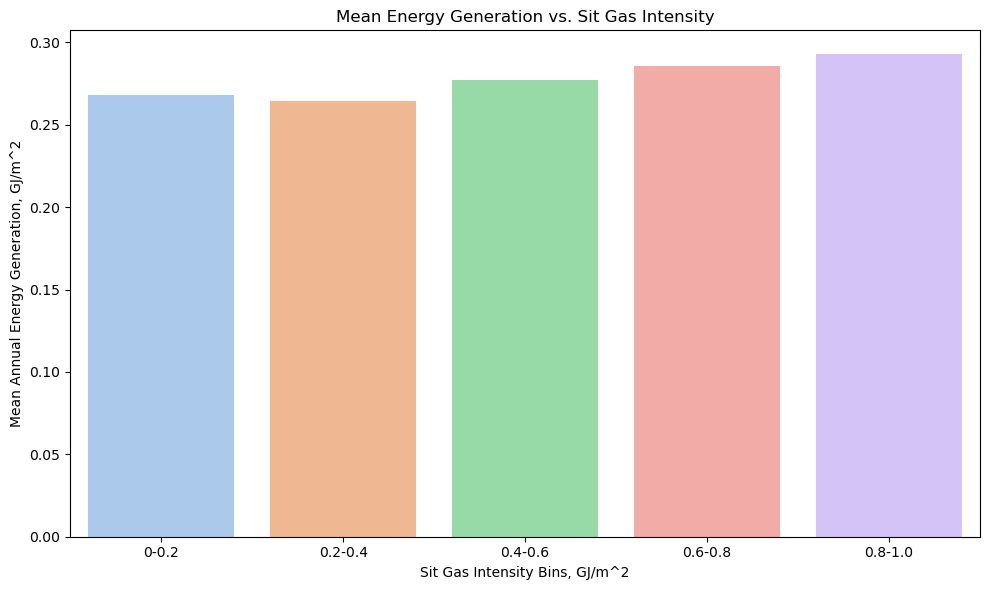

In [28]:
# Convert 'WN_Sit_Gas_Int1' to numeric, handling non-convertible values
all_data_filtered['WN_Sit_Gas_Int1'] = pd.to_numeric(all_data_filtered['WN_Sit_Gas_Int1'], errors='coerce')

# Define the bins and labels for 'WN_Sit_Gas_Int1'
num_bins_gas = 5
gas_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
gas_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]  # Define bin edges for WN_Sit_Gas_Int1

# Create bins with custom labels for 'WN_Sit_Gas_Int1'
all_data_filtered['Sit_Gas_Intensity_Bins'] = pd.cut(all_data_filtered['WN_Sit_Gas_Int1'], bins=gas_bins, labels=gas_labels)

# Group by 'Sit_Gas_Intensity_Bins' and find the mean of 'Annual_energy_generation_GJ/m^2'
grouped_data_gas = all_data_filtered.groupby('Sit_Gas_Intensity_Bins')['Annual_energy_generation_GJ/m^2'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Sit_Gas_Intensity_Bins', y='Annual_energy_generation_GJ/m^2', data=grouped_data_gas, palette=pastel_palette)
plt.xlabel('Sit Gas Intensity Bins, GJ/m^2')
plt.ylabel('Mean Annual Energy Generation, GJ/m^2')
plt.title('Mean Energy Generation vs. Sit Gas Intensity')
plt.tight_layout()
plt.show()


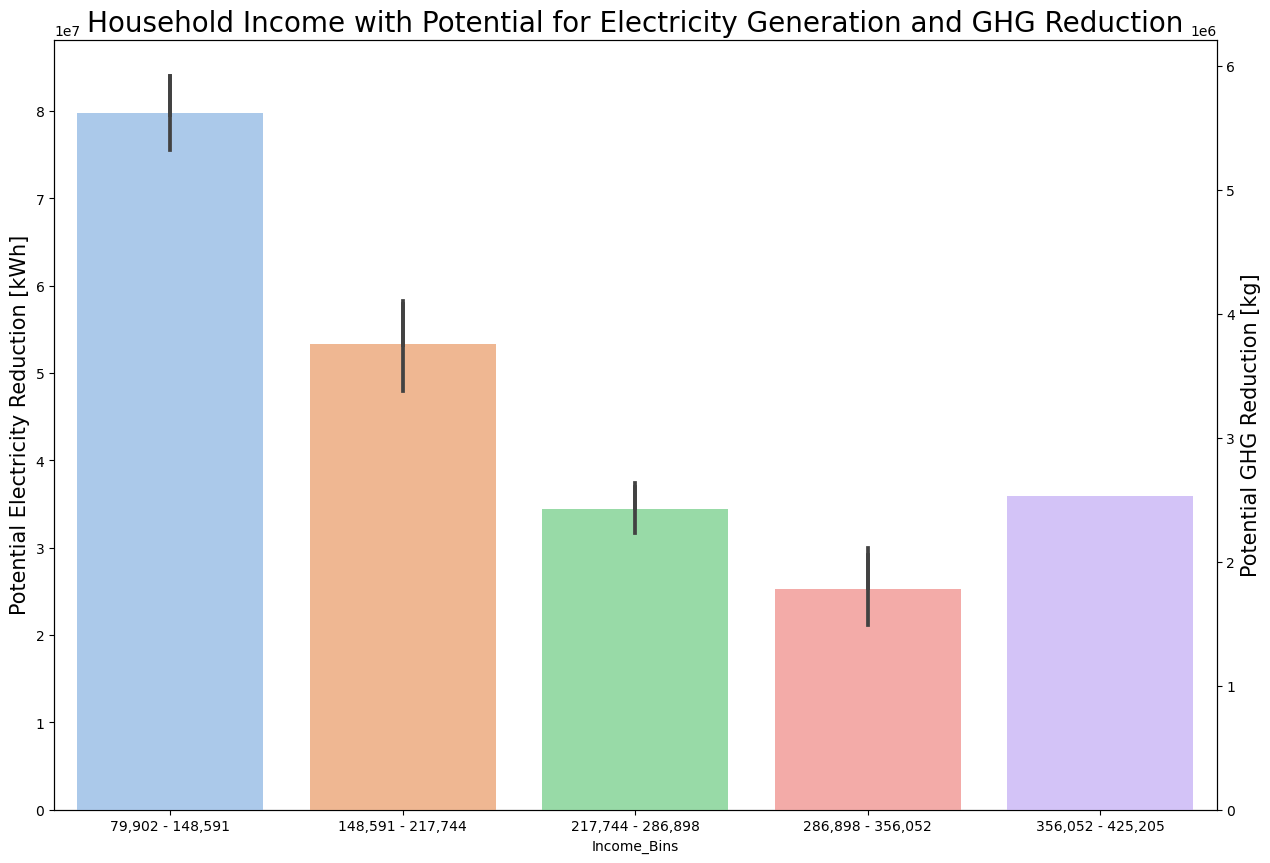

In [30]:
plt.figure(figsize=(15, 10))
plt.title('Household Income with Potential for Electricity Generation and GHG Reduction', fontsize=20)

ax1 = sns.barplot(x='Income_Bins', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Income_Bins', y='Annual_ghg_reduction_kg', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)

ax1.set_ylabel('Potential Electricity Reduction [kWh]', fontsize=15)
ax2.set_ylabel('Potential GHG Reduction [kg]', fontsize=15)

plt.xlabel('Average Household Income Bins', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels())

plt.show()


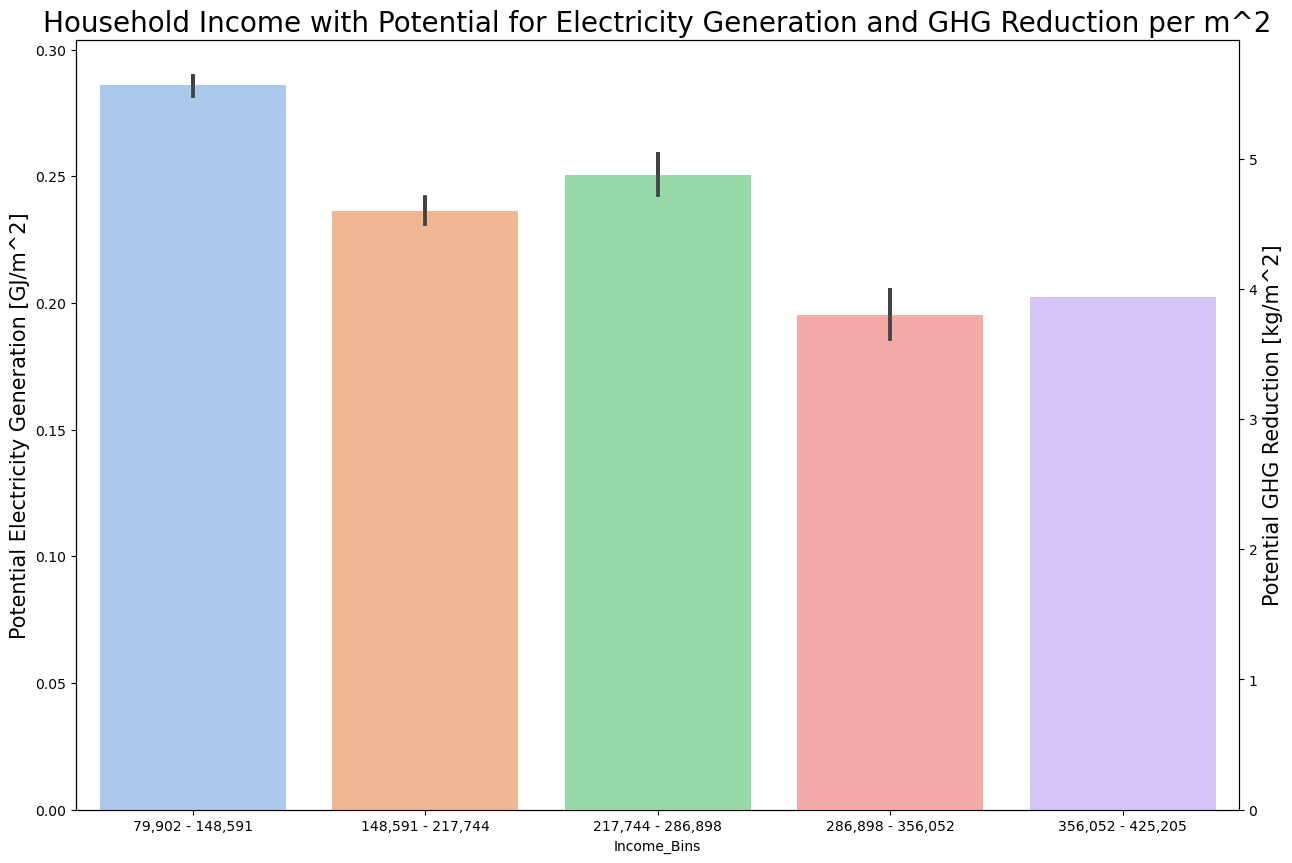

In [31]:
plt.figure(figsize=(15, 10))
plt.title('Household Income with Potential for Electricity Generation and GHG Reduction per m^2', fontsize=20)

ax1 = sns.barplot(x='Income_Bins', y='Annual_energy_generation_GJ/m^2', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Income_Bins', y='Annual_ghg_reduction_kg/m^2', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)

ax1.set_ylabel('Potential Electricity Generation [GJ/m^2]', fontsize=15)
ax2.set_ylabel('Potential GHG Reduction [kg/m^2]', fontsize=15)

plt.xlabel('Average Household Income', fontsize=30)
ax1.set_xticklabels(ax1.get_xticklabels())
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=30)

plt.show()


Text(0, 0.5, 'Annual electricity generation, kWh')

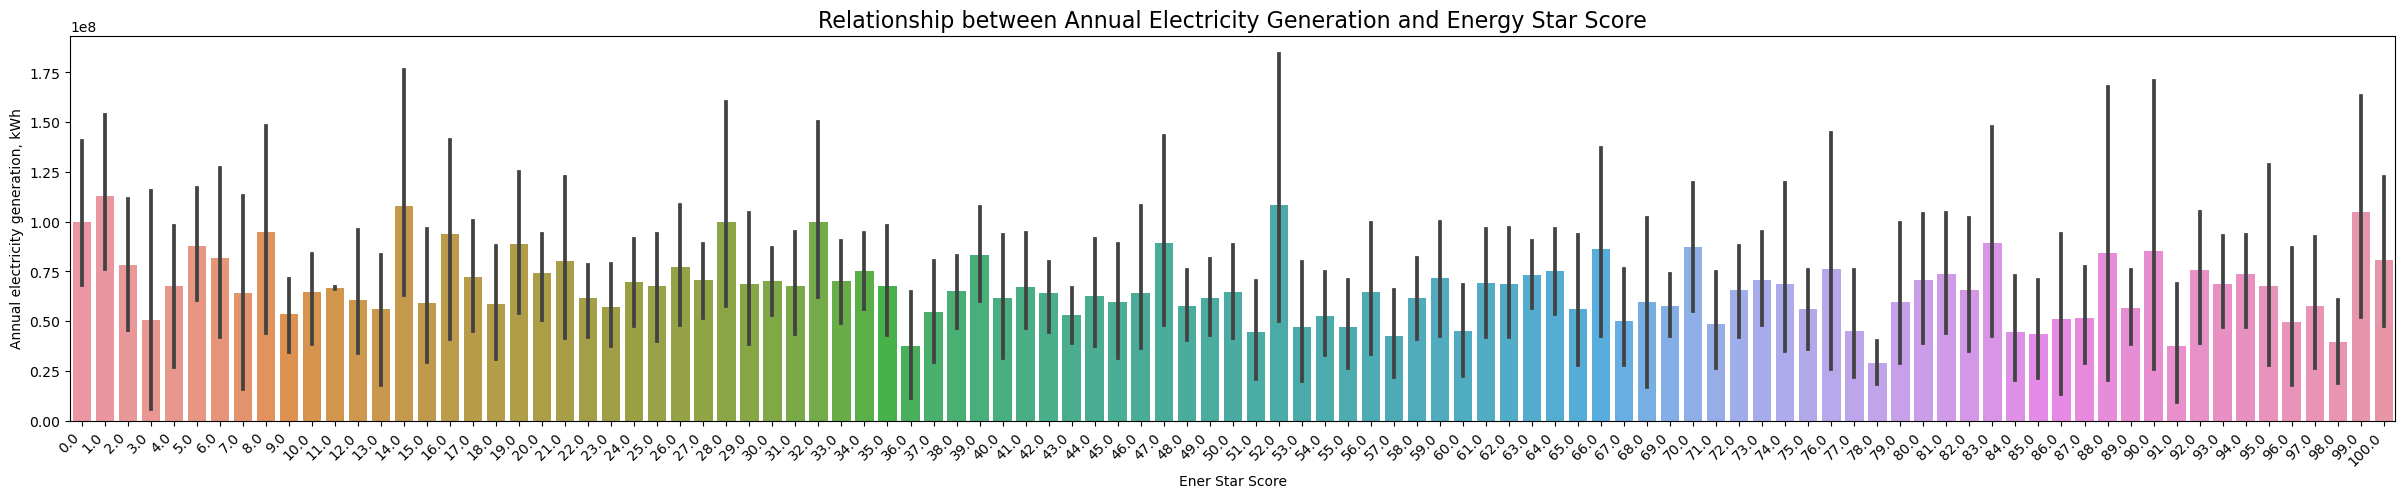

In [34]:
# Write your code here.
plt.figure(figsize = (30,5))
plt.title('Relationship between Annual Electricity Generation and Energy Star Score', fontsize = 16) #title is added to canvas so do it here, not the lineplot itself

ax = sns.barplot(x='Ener_Star_Score', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean)

plt.xlabel('Ener Star Score')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Annual electricity generation, kWh')

<function matplotlib.pyplot.show(close=None, block=None)>

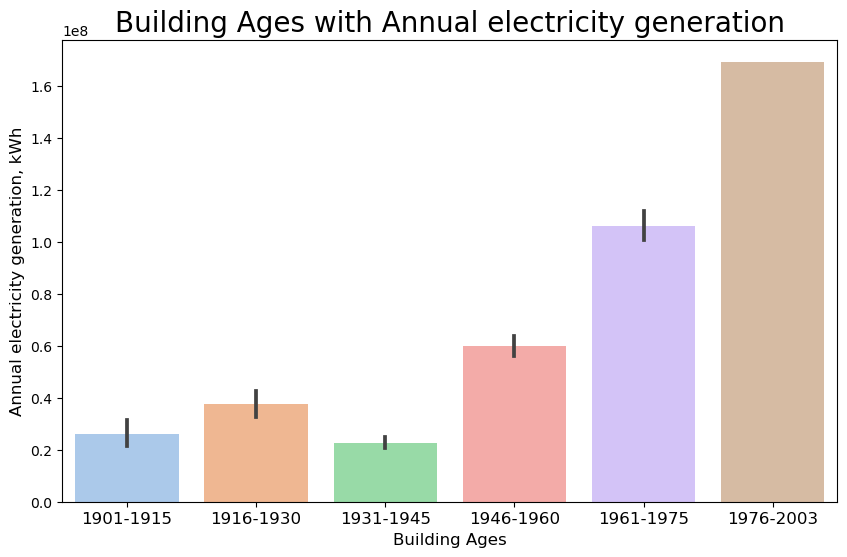

In [35]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Annual electricity generation', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

desired_order = ['1901-1915', '1916-1930', '1931-1945', '1946-1960', '1961-1975', '1976-2003']

ax = sns.barplot(x='Average_Age', y='Annual_electricity_generation_k', data=all_data_filtered, estimator=np.mean, order=desired_order, palette=pastel_palette)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Annual electricity generation, kWh', fontsize = 12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

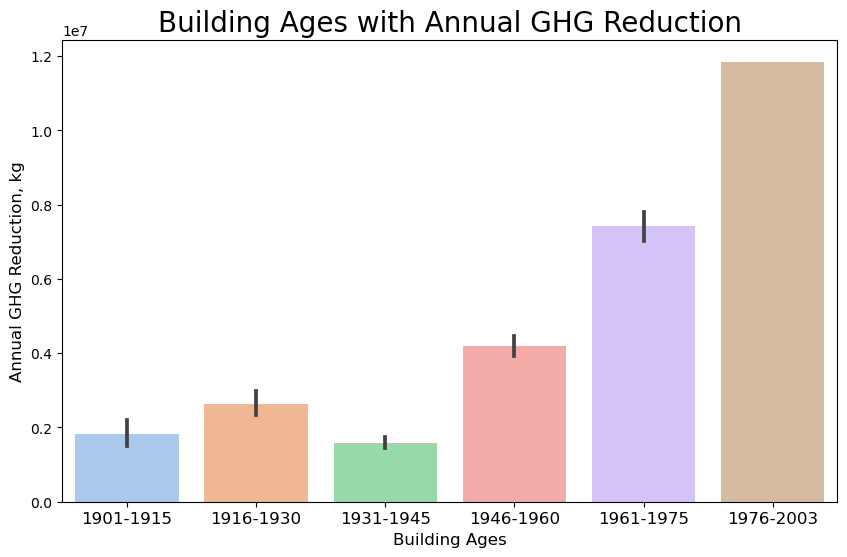

In [36]:
# Write your code here.
plt.figure(figsize = (10,6))
plt.title('Building Ages with Annual GHG Reduction', fontsize = 20) #title is added to canvas so do it here, not the lineplot itself

desired_order = ['1901-1915', '1916-1930', '1931-1945', '1946-1960', '1961-1975', '1976-2003']

ax = sns.barplot(x='Average_Age', y='Annual_ghg_reduction_kg', data=all_data_filtered, estimator=np.mean, order=desired_order, palette=pastel_palette)

plt.xlabel('Building Ages', fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylabel('Annual GHG Reduction, kg', fontsize = 12)

plt.show

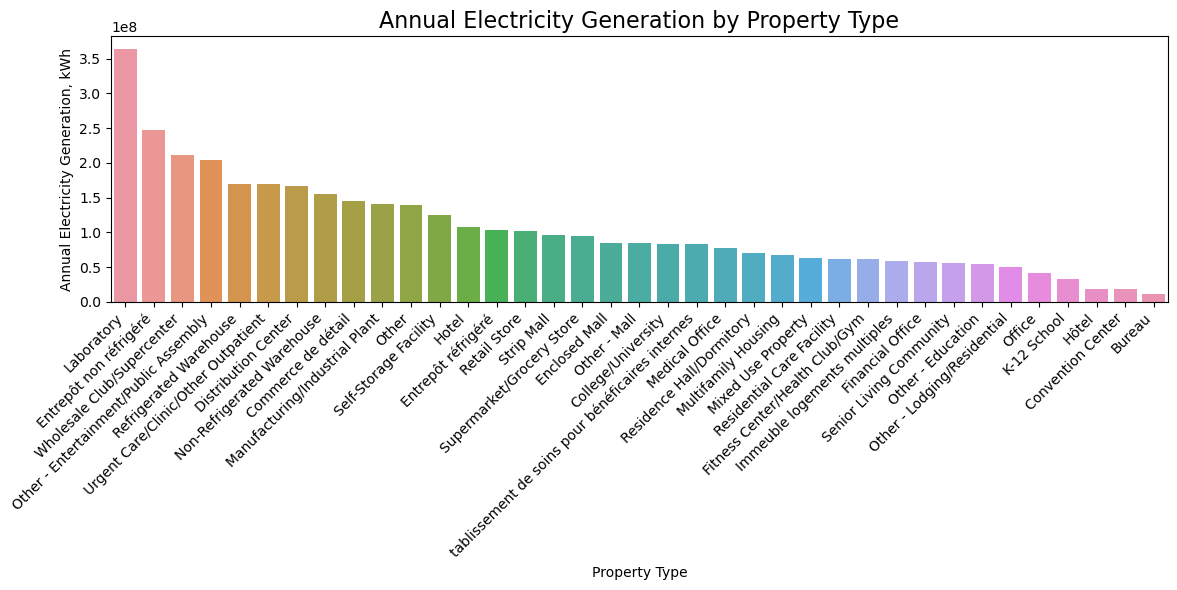

In [40]:
plt.figure(figsize=(12, 6))
plt.title('Annual Electricity Generation by Property Type', fontsize=16)

# Calculate the mean of 'Annual_electricity_generation_k' for each property type
grouped_data = all_data_filtered.groupby('PrimPropTypCalc')['Annual_electricity_generation_k'].mean().reset_index()

# Sort the data by 'Annual Electricity Generation' in descending order
sorted_data = grouped_data.sort_values(by='Annual_electricity_generation_k', ascending=False)

# Use the sorted data for the bar plot
ax = sns.barplot(x='PrimPropTypCalc', y='Annual_electricity_generation_k', data=sorted_data, order=sorted_data['PrimPropTypCalc'])

plt.xlabel('Property Type')
plt.ylabel('Annual Electricity Generation, kWh')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


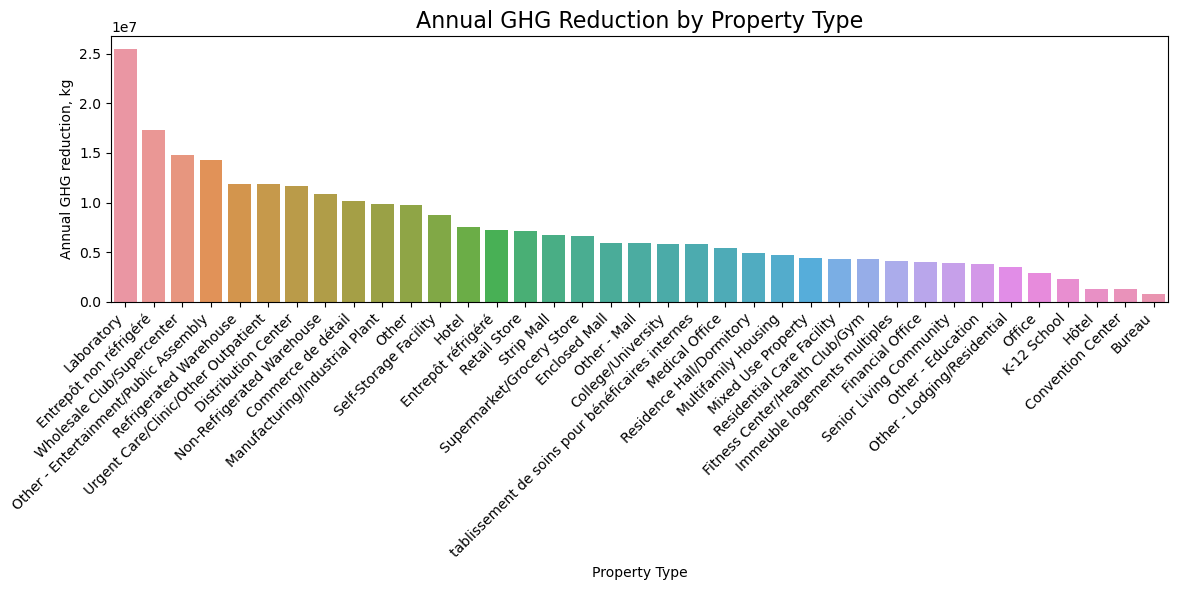

In [42]:
# Calculate the mean of 'Annual_ghg_reduction_kg' for each property type
grouped_data = all_data_filtered.groupby('PrimPropTypCalc')['Annual_ghg_reduction_kg'].mean().reset_index()

# Sort the data by 'Annual_ghg_reduction_kg' in descending order
sorted_data = grouped_data.sort_values(by='Annual_ghg_reduction_kg', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Annual GHG Reduction by Property Type', fontsize=16)

# Use the sorted data for the bar plot
ax = sns.barplot(x='PrimPropTypCalc', y='Annual_ghg_reduction_kg', data=sorted_data, order=sorted_data['PrimPropTypCalc'])

plt.xlabel('Property Type')
plt.ylabel('Annual GHG reduction, kg')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


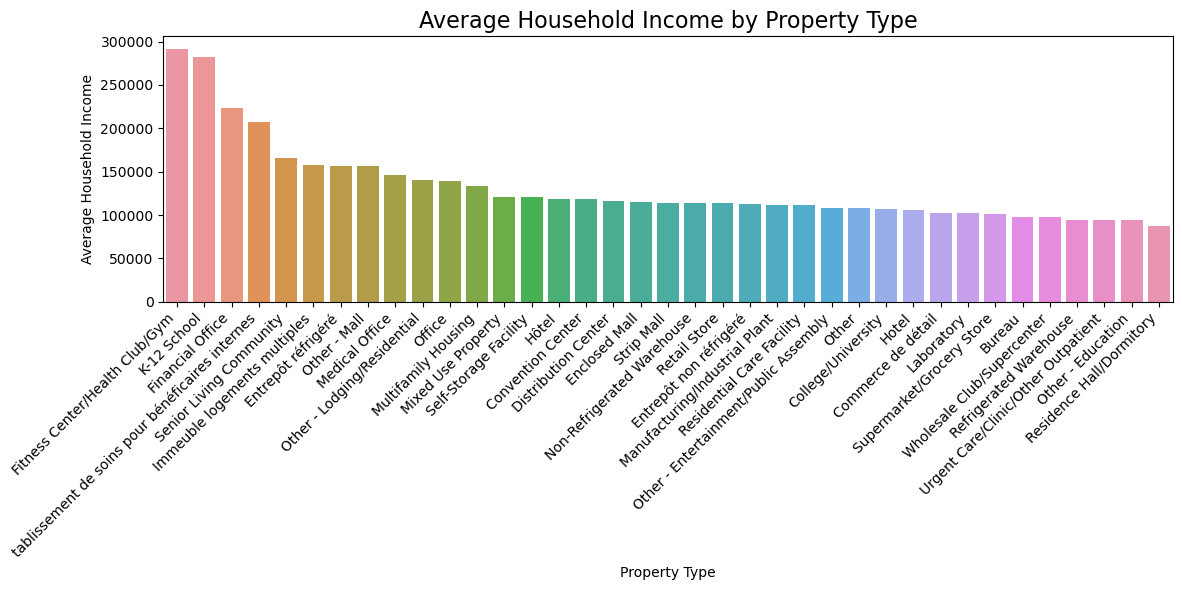

In [43]:
plt.figure(figsize=(12, 6))
plt.title('Average Household Income by Property Type', fontsize=16)

# Calculate the mean of 'Average_Household_Income' for each 'PrimPropTypCalc'
grouped_data = all_data_filtered.groupby('PrimPropTypCalc')['Average_Household_Income'].mean().reset_index()

# Sort the data by 'Average Household Income' in descending order
sorted_data = grouped_data.sort_values(by='Average_Household_Income', ascending=False)

# Use the sorted data for the bar plot
ax = sns.barplot(x='PrimPropTypCalc', y='Average_Household_Income', data=sorted_data, order=sorted_data['PrimPropTypCalc'])

plt.xlabel('Property Type')
plt.ylabel('Average Household Income')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


C:\Users\zereb\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\zereb\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\zereb\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


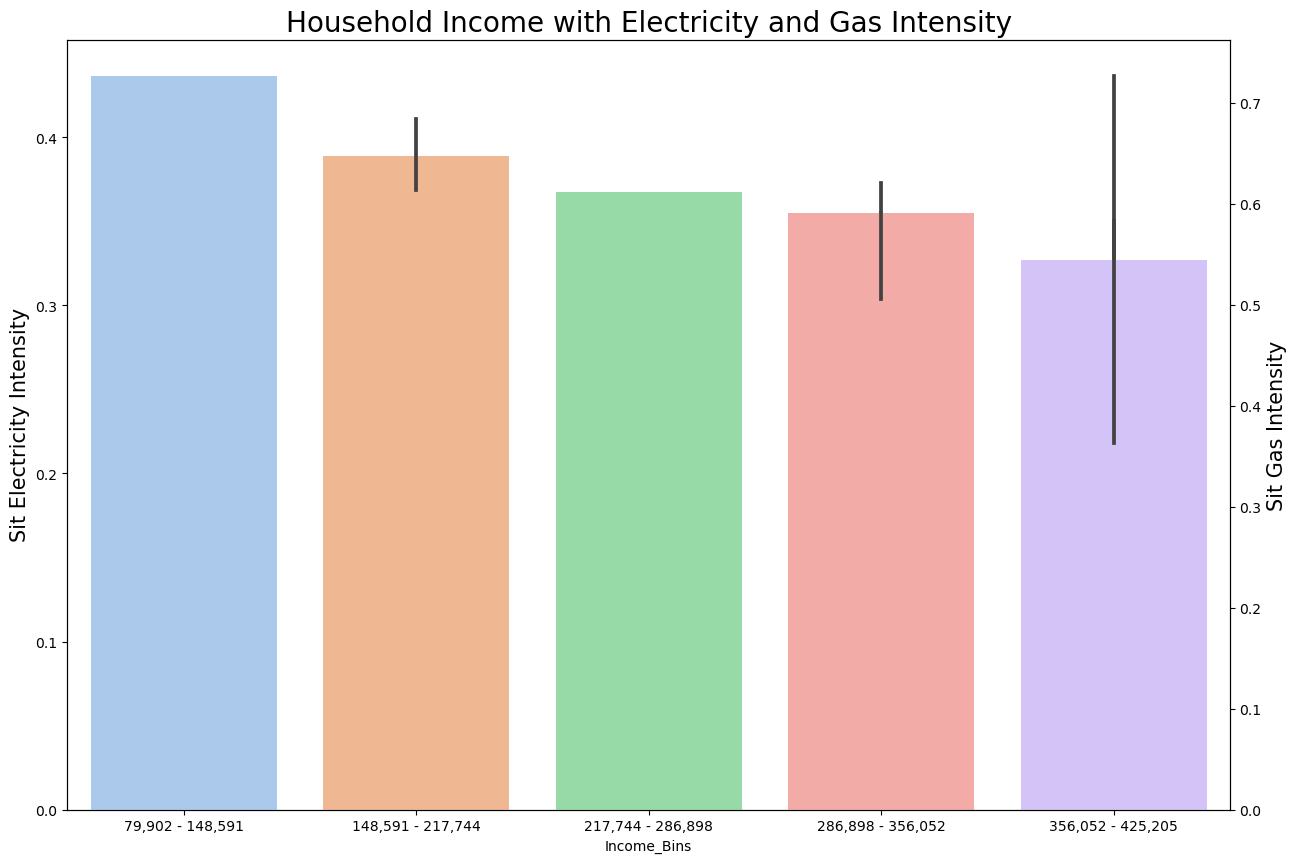

In [44]:
plt.figure(figsize=(15, 10))
plt.title('Household Income with Electricity and Gas Intensity', fontsize=20)

ax1 = sns.barplot(x='Income_Bins', y='WN_Sit_Elc_Int1', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)
ax2 = ax1.twinx()
ax2 = sns.barplot(x='Income_Bins', y='WN_Sit_Gas_Int1', data=all_data_filtered, estimator=np.mean, palette=pastel_palette)

ax1.set_ylabel('Sit Electricity Intensity', fontsize=15)
ax2.set_ylabel('Sit Gas Intensity', fontsize=15)

plt.xlabel('Average Household Income', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels())

# Adjust the tick parameters
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True, labelsize=25)

plt.show()


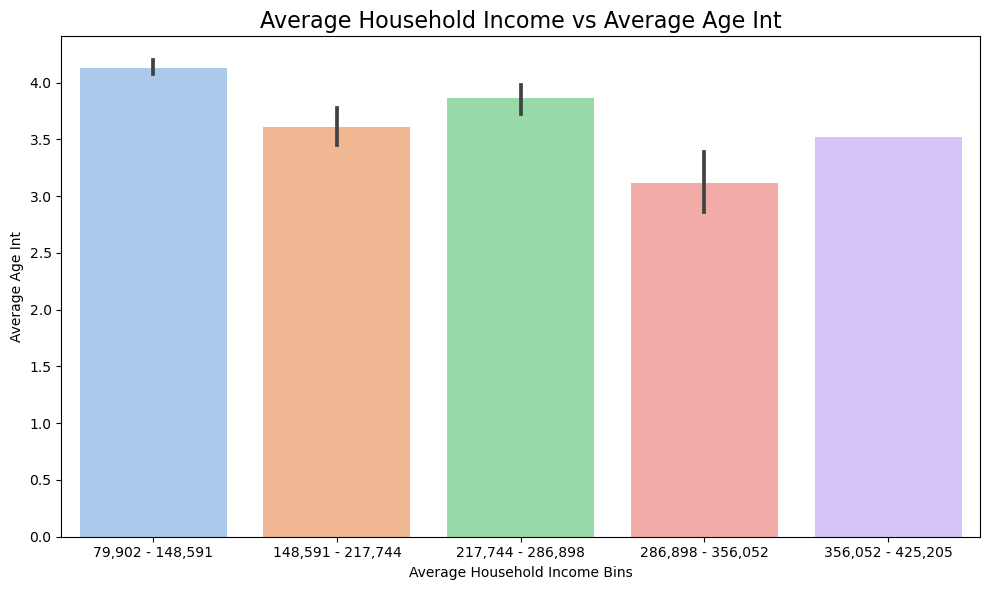

In [45]:
plt.figure(figsize=(10, 6))
plt.title('Average Household Income vs Average Age Int', fontsize=16)

sns.barplot(x='Income_Bins', y='Average_Age_int', data=all_data_filtered, palette=pastel_palette, order=bin_labels, estimator=np.mean)

plt.xlabel('Average Household Income Bins')
plt.ylabel('Average Age Int')

plt.tight_layout()
plt.show()